In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
dataset_1 = pd.read_excel('./xlsx (1).xlsx')
dataset_2 = pd.read_excel('./xlsx (2).xlsx')
dataset_3 = pd.read_excel('./xlsx (5).xlsx')
dataset_4 = pd.read_excel('./xlsx (6).xlsx')
dataset_5 = pd.read_excel('./xlsx (7).xlsx')
dataset_6 = pd.read_excel('./xlsx (8).xlsx')

dataset_1.head()

,Date Time,Status,Speed(Km/h),Latitude,Longitude,Reference,Mileage
0,2023-05-25 - 00:16:12,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
1,2023-05-25 - 00:46:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
2,2023-05-25 - 01:16:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
3,2023-05-25 - 01:46:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
4,2023-05-25 - 02:16:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0


In [20]:
dataset_1.Status.unique()

array(['Normal', 'Ignition On', 'Driver SeatBelt Open',
       'Driver SeatBelt Close', 'Ignition Off', 'Passenger SeatBelt Open'],
      dtype=object)

In [25]:
ignition_on = dataset_1[dataset_1.Status == 'Ignition On']
ignition_on_points = list(ignition_on.index)
ignition_off = dataset_1[dataset_1.Status == 'Ignition Off']
ignition_off_points = list(ignition_off.index)

trip_lst = []
for i in range(len(ignition_on_points)):
    if ignition_off_points[i] > ignition_on_points[i]:
        trip = [ignition_on_points[i], ignition_off_points[i]]
        trip_lst.append(trip)
trip_lst

[[18, 408],
 [428, 994],
 [1022, 1432],
 [1452, 2111],
 [2113, 2169],
 [2202, 2635],
 [2637, 2646],
 [2647, 2654],
 [2659, 2680],
 [2683, 2710]]

In [26]:
trps = []
for i in trip_lst:
    t = dataset_1.loc[i[0]:i[1]: ]
    trps.append(t)

In [27]:
trps[1]

,Date Time,Status,Speed(Km/h),Latitude,Longitude,Reference,Mileage
428,2023-05-25 - 19:02:38,Ignition On,0,24.85659,67.00736,"0.00 Km From CPLC Parking, Court St, Ali Dina ...",20
429,2023-05-25 - 19:02:43,Normal,0,24.85659,67.00736,"0.00 Km From CPLC Parking, Court St, Ali Dina ...",20
430,2023-05-25 - 19:02:48,Normal,0,24.85659,67.00736,"0.00 Km From CPLC Parking, Court St, Ali Dina ...",20
431,2023-05-25 - 19:02:53,Normal,0,24.85659,67.00736,"0.00 Km From CPLC Parking, Court St, Ali Dina ...",20
432,2023-05-25 - 19:02:58,Normal,0,24.85659,67.00736,"0.00 Km From CPLC Parking, Court St, Ali Dina ...",20
...,...,...,...,...,...,...,...
990,2023-05-25 - 19:46:30,Normal,1,24.95629,67.11987,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",42
991,2023-05-25 - 19:46:35,Normal,0,24.95629,67.11987,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",42
992,2023-05-25 - 19:46:37,Driver SeatBelt Close,0,24.95629,67.11987,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",42
993,2023-05-25 - 19:46:42,Normal,0,24.95629,67.11987,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",42


# Trip Analysis Function
* The below line graph represents the whole trip w.r.t longitude and latitude.
* The red line represents, where overspeeding occured.
* The brown dot represents, when the driver put on the seat belt.
* The black dot represents, when the driver off on the seat belt.
* The red dot represents, when the driver applied harsh breaks.
* The blue dots represents, when the driver was driving at maximum speed.

In [29]:
def analyze_trip(dataset):
    ignition_on = dataset[dataset.Status == 'Ignition On']
    ignition_on_points = list(ignition_on.index)
    ignition_off = dataset[dataset.Status == 'Ignition Off']
    ignition_off_points = list(ignition_off.index)

    trips_end_points = []
    for i in range(len(ignition_on_points)):
        if ignition_off_points[i] > ignition_on_points[i]:
            trip_corners = [ignition_on_points[i], ignition_off_points[i]]
            trips_end_points.append(trip_corners)
            
    trips = []
    for i in trips_end_points:
        trip = dataset.loc[i[0]:i[1]: ]
        trips.append(trip)    
            
            
    # Plots
    for trip in trips:
        
        over_speeding = trip[trip['Speed(Km/h)'] > 80]
        seatbelt_on = trip[trip.Status == 'Driver SeatBelt Open']
        seatbelt_off = trip[trip.Status == 'Driver SeatBelt Close']
        
        harsh_breaks = abs(trip['Speed(Km/h)'].diff())
        trip['Harsh_breaks'] = harsh_breaks
        harsh_break_pointS = trip[trip['Harsh_breaks'] > 30]
        
        max_speed = trip['Speed(Km/h)'].max()
        max_speed_points = trip[trip['Speed(Km/h)'] == max_speed]
        
        plt.plot(trip['Longitude'], trip['Latitude'], linestyle='dashed', color='green')
        plt.plot(over_speeding['Longitude'], over_speeding['Latitude'], color='red', linewidth=3)
        plt.scatter(seatbelt_on['Longitude'], seatbelt_on['Latitude'], color='brown')
        plt.scatter(seatbelt_off['Longitude'], seatbelt_off['Latitude'], color='black')
        plt.scatter(harsh_break_pointS['Longitude'], harsh_break_pointS['Latitude'], color='red')
        plt.scatter(max_speed_points['Longitude'], max_speed_points['Latitude'], color='blue')
        
        
        plt.show()

In [30]:
dataset_1.head()

,Date Time,Status,Speed(Km/h),Latitude,Longitude,Reference,Mileage
0,2023-05-25 - 00:16:12,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
1,2023-05-25 - 00:46:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
2,2023-05-25 - 01:16:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
3,2023-05-25 - 01:46:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0
4,2023-05-25 - 02:16:13,Normal,0,24.95635,67.11983,"0.00 Km From Memon Resturant, Sachal Goth - Ka...",0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


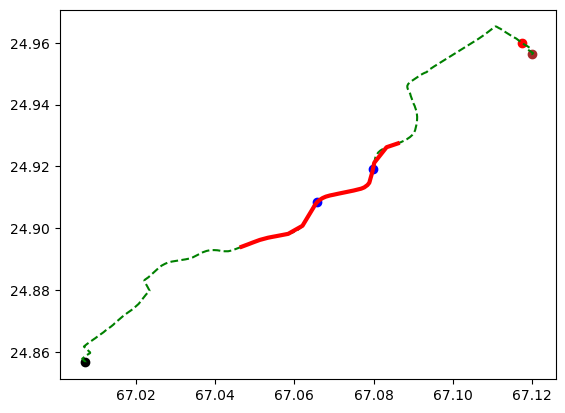

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


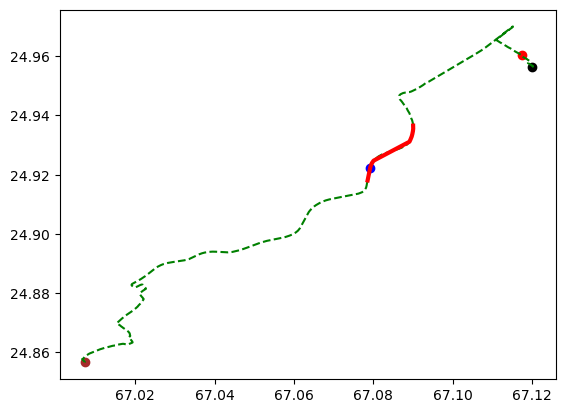

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


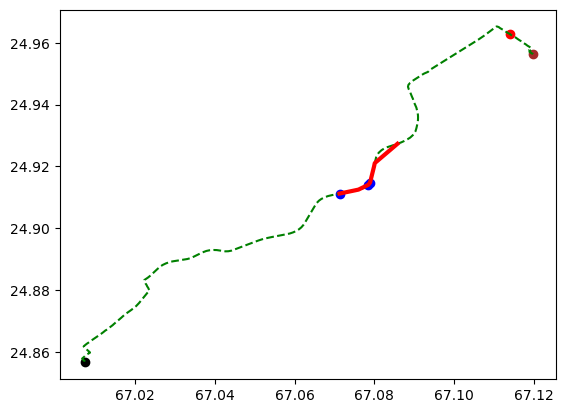

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


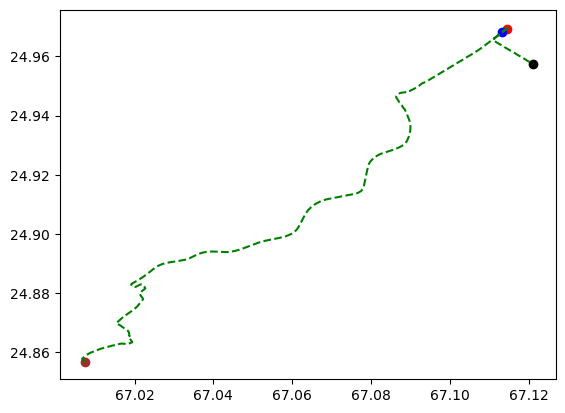

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


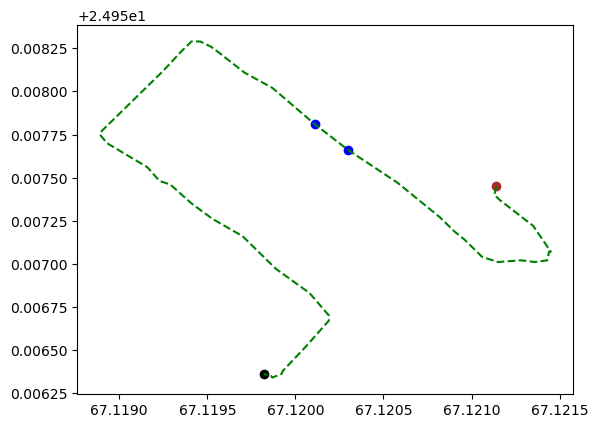

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


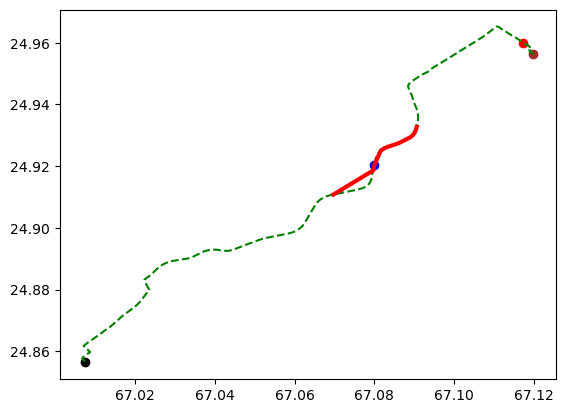

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


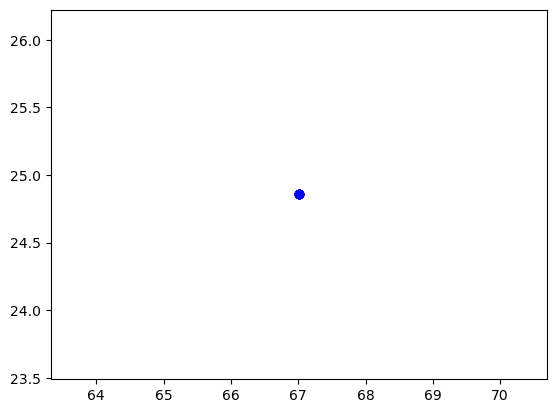

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


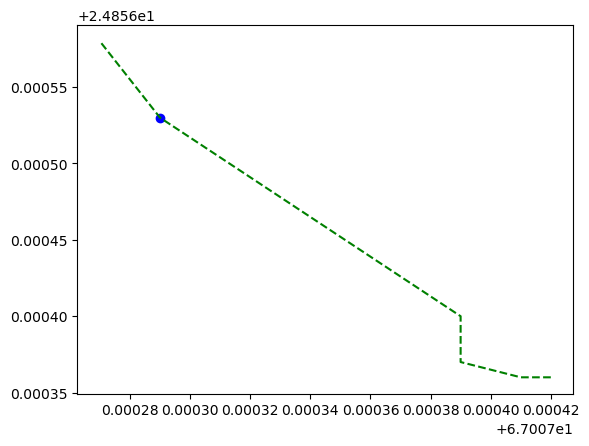

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


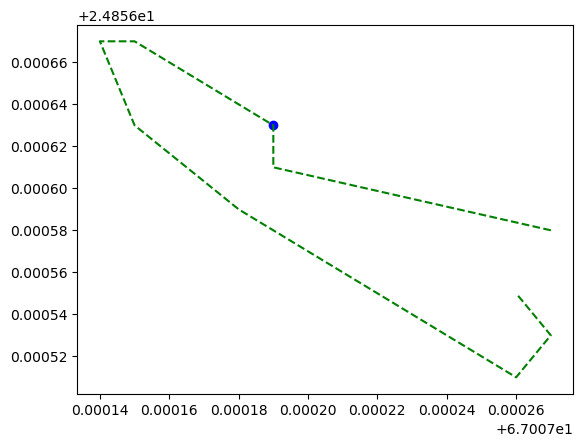

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\1420361283.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


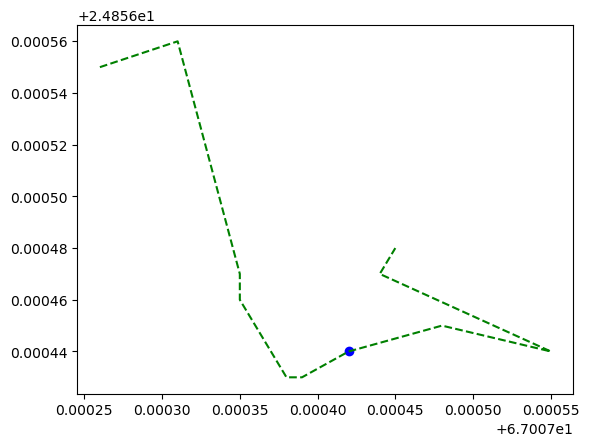

In [31]:
analyze_trip(dataset_1)

In [23]:
dataset_2.head()

,Date Time,Status,Speed(Km/h),Latitude,Longitude,Reference,Mileage
0,2023-06-01 - 00:29:56,Normal,0,24.86531,67.06335,"0.00 Km From AMPAC, Generators, Razi Road, Blo...",0
1,2023-06-01 - 00:59:56,Normal,0,24.86531,67.06335,"0.00 Km From AMPAC, Generators, Razi Road, Blo...",0
2,2023-06-01 - 01:29:56,Normal,0,24.86531,67.06335,"0.00 Km From AMPAC, Generators, Razi Road, Blo...",0
3,2023-06-01 - 01:59:56,Normal,0,24.86531,67.06335,"0.00 Km From AMPAC, Generators, Razi Road, Blo...",0
4,2023-06-01 - 02:29:56,Normal,0,24.86531,67.06335,"0.00 Km From AMPAC, Generators, Razi Road, Blo...",0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


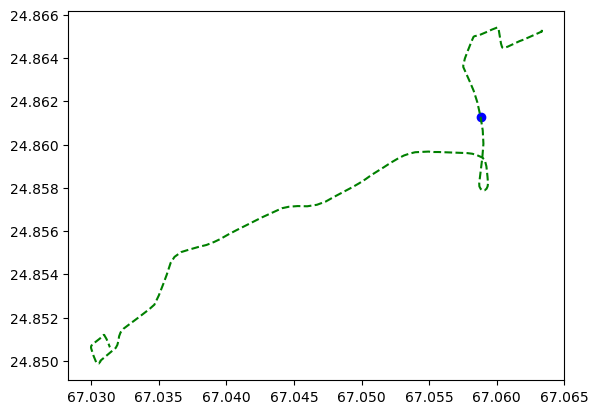

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


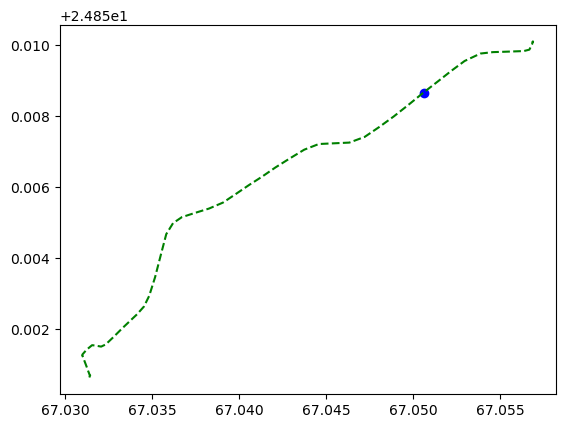

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


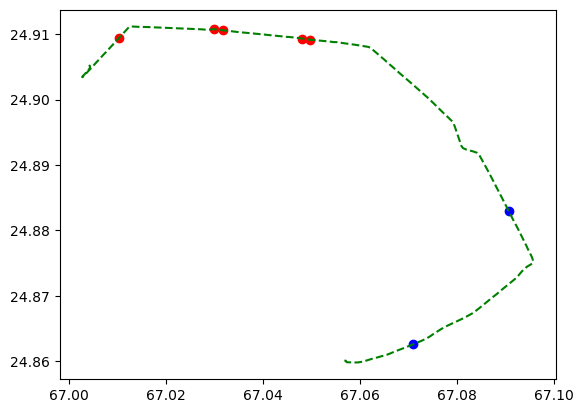

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


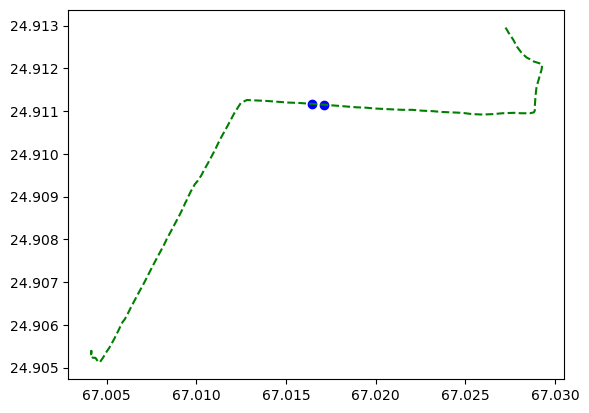

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


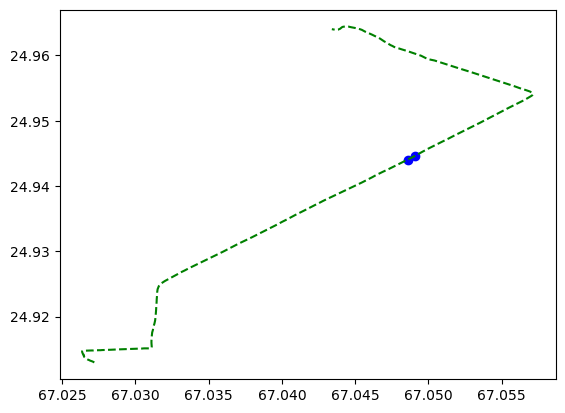

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


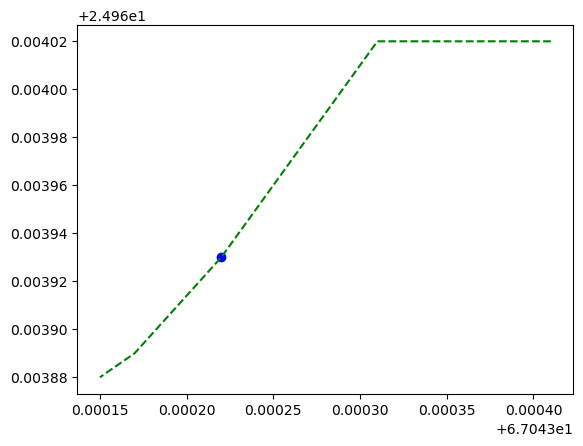

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


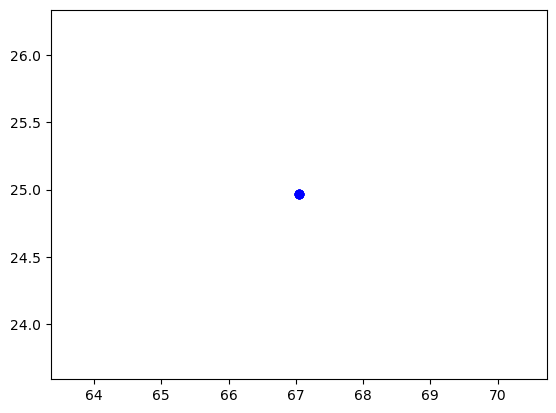

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


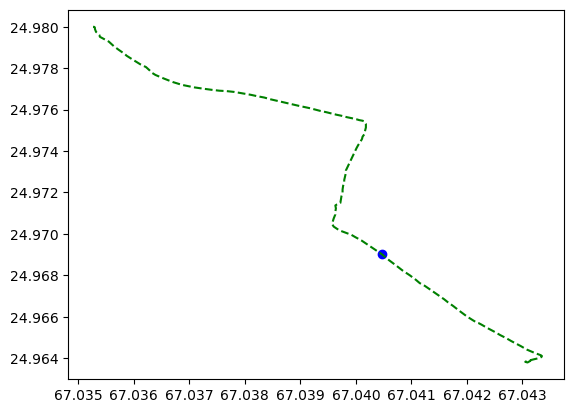

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


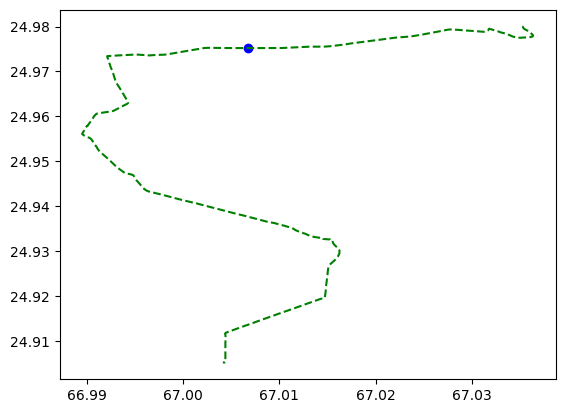

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


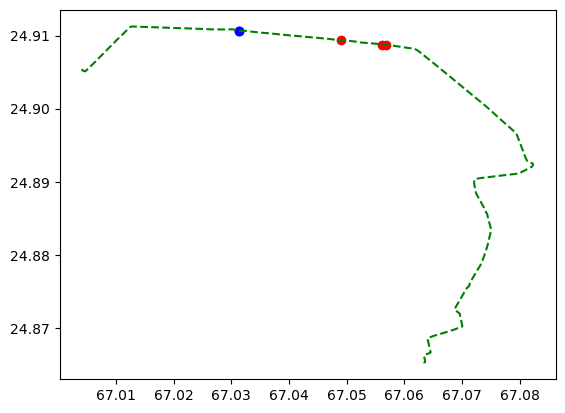

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


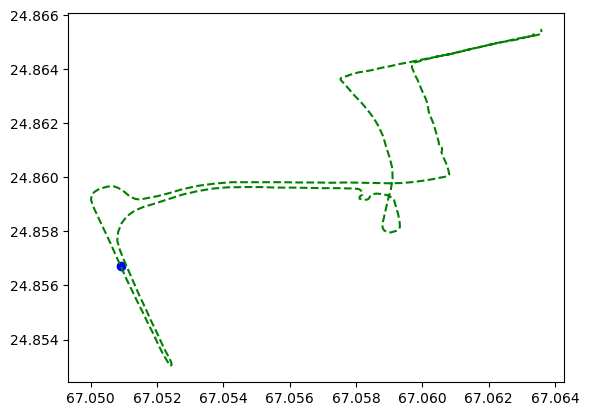

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


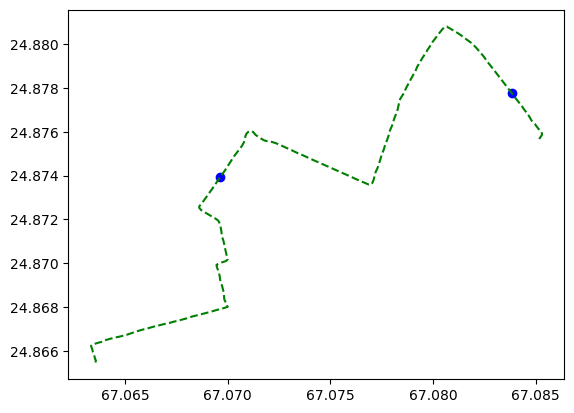

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


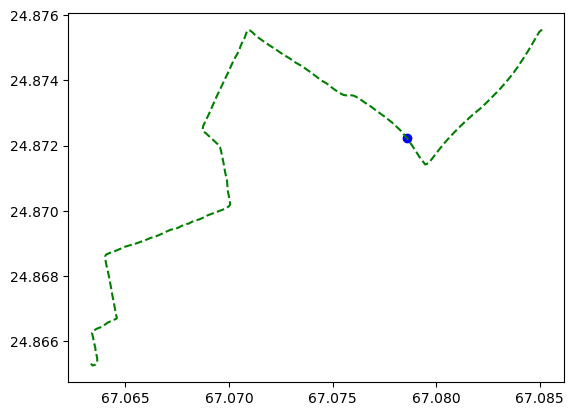

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


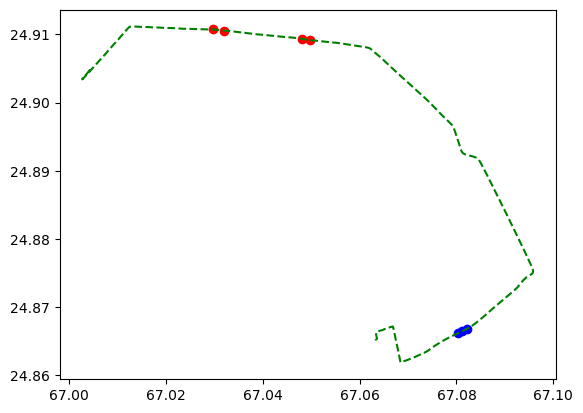

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


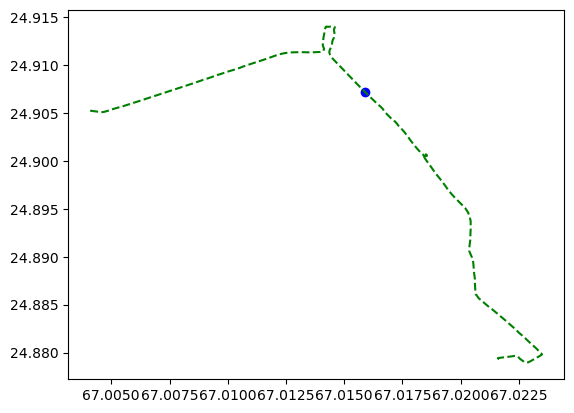

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


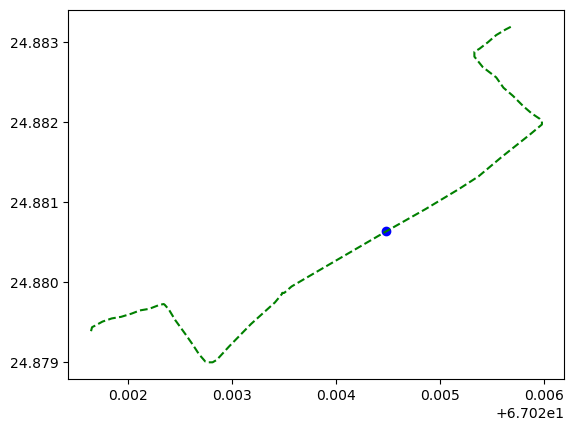

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


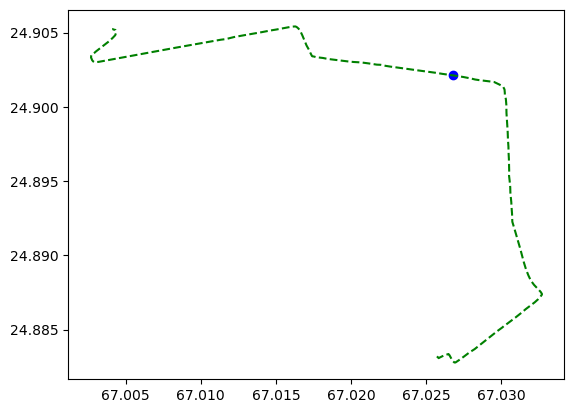

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11292\3501066094.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['Harsh_breaks'] = harsh_breaks


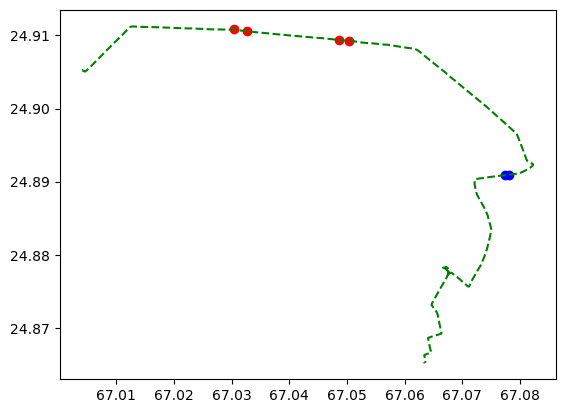

In [24]:
analyze_trip(dataset_2)